# Uso de inteligencia artificial para mejorar el desempeño de un proyecto de generación fotovoltaica

## Seminario de Analítica y Ciencia de Datos

Moisés Alfonso Guerrero Jiménez, Andrés Castaño Licona

### Descripción Datos

Tal como se indicó en entregas previas, se realizó un acercamiento con un funcionario de EPM perteneciente a la Unidad de Hidrometría y Calidad Generación, correspondiente al área responsable del gobierno de datos del proyecto Tepuy y otros relativos a la generación de energía.

De acuerdo a la información suministrada por el funcionario, la fuente de información corresponde a datos medidos en una estación meteorológica ubicada en la zona de actual instalación del proyecto en el municipio de La Dorada, Caldas.

Las variables medidas en la estación que nos fueron informadas, corresponden a:

* Irradiación solar
* Temperatura
* Humedad relativa
* Precipitación
* Velocidad del viento
* Dirección del viento
* Marca de tiempo

Dado que actualmente no ha sido posible aún obtener acceso al conjunto de datos requerido, se realizará un análisis y preprocesamiento haciendo uso de un dataset disponible en *Kaggle*, que cuenta con variables similares a las ya mencionadas. Este preprocesamiento y análisis podrá ser aplicado de manera muy similar al dataset del proyecto Tepuy, una vez se tenga el acceso requerido.

El dataset mencionado está disponible en el enlace https://www.kaggle.com/datasets/dronio/SolarEnergy, lleva por nombre *Solar Radiation Prediction* y contiene datos meteorológicos del HI-SEAS en Hawaii, una estación de simulación espacial análoga en un espacio aislado similar a la superficie de Marte o la Luna, situado cerca al volcán Mauna Loa.

Los datos de este dataset incluyen:

* Irradiación solar $[W/m^2]$
* Temperatura $[°F]$
* Presión barométrica $[Hg]$
* Humedad $[\%]$
* Dirección del viento $[°]$
* Velocidad del viento $[mph]$
* Hora de salida/puesta del sol.
* Marca de tiempo

## Lectura de los datos

Se realiza la lectura de los datos directamente por medio de la API de Kaggle, haciendo uso de un archivo de credenciales `kaggle.json`, el cual debe ser incluido dentro del entorno de ejecución del Colab al momento de ejecutar el notebook.

In [2]:
# Importamos la librería json requerida para leer el archivo de credenciales
import json

# Como prerrequisito es necesario tener un archivo de credenciales kaggle.json en el directorio del notebook
file = open('kaggle.json',"r")
api_token = json.load(file)

In [3]:
# Creamos el directorio de .kaggle dentro del entorno de Colab
! mkdir /root/.kaggle

# Agregamos el archivo kaggle.json vacío
! touch /root/.kaggle/kaggle.json

In [4]:
# Abrimos el archivo y escribimos el token
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

# Asignamos permisos para acceder al archivo de credenciales
! chmod 600 /root/.kaggle/kaggle.json

In [5]:
# Instalamos kaggle CLI
! pip install kaggle

# Descargamos el Dataset con la API de kaggle
! kaggle datasets download -d dronio/SolarEnergy

# Descomprimimos el archivo .zip descargado
! unzip -q SolarEnergy.zip

  0% 0.00/511k [00:00<?, ?B/s]
100% 511k/511k [00:00<00:00, 110MB/s]


El archivo descargado y descomprimido se encuentra en formato CSV con nombre `SolarPrediction.csv`

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [47]:
# Se realiza la lectura del archivo CSV
df = pd.read_csv('SolarPrediction.csv', sep = ',', header = 0)

In [48]:
df

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
...,...,...,...,...,...,...,...,...,...,...,...
32681,1480587604,12/1/2016 12:00:00 AM,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00
32682,1480587301,12/1/2016 12:00:00 AM,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00
32683,1480587001,12/1/2016 12:00:00 AM,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00
32684,1480586702,12/1/2016 12:00:00 AM,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00


In [49]:
# Observamos los tipos de dato
df.dtypes

UNIXTime                    int64
Data                       object
Time                       object
Radiation                 float64
Temperature                 int64
Pressure                  float64
Humidity                    int64
WindDirection(Degrees)    float64
Speed                     float64
TimeSunRise                object
TimeSunSet                 object
dtype: object

Inicialmente se observa que el dataset incluye columnas `UNIXTime`, `Data`, `Time`, `TimeSunRise` y `TimeSunSet`, estas columnas representan marcas de tiempo que deben ser inicialmente ajustadas.

Si revisamos los tipos de dato para estas columnas, se observa que por defecto al realizar la lectura del CSV, *Pandas* asigna tipos de dato `object` (o `int64` para el caso de UNIXTime), por tanto iniciaremos por realizar transformaciones a estas columnas.

Para realizar la transformación de la columna UNIXTime, primero buscamos incluir una breve descripción de este valor.

De acuerdo a lo indicado en el sitio https://kb.narrative.io/what-is-unix-time, el Unix Time es un sistema para representar un punto en el tiempo contando el número de segundos que han pasado desde `1970-01-01 00:00:00` siendo este momento en el tiempo el valor *0*.

En python podemos realizar la conversión de formato Unix Time a marca de tiempo, por medio de la función `datetime.datetime.fromtimestamp()`.

In [50]:
# Creamos una nueva columna con nombre DatetimeUTC
df['DatetimeUTC'] = df['UNIXTime'].apply(lambda t: datetime.datetime.fromtimestamp(t))
df

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,DatetimeUTC
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,2016-09-30 09:55:26
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,2016-09-30 09:50:23
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,2016-09-30 09:45:26
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,2016-09-30 09:40:21
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,2016-09-30 09:35:24
...,...,...,...,...,...,...,...,...,...,...,...,...
32681,1480587604,12/1/2016 12:00:00 AM,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00,2016-12-01 10:20:04
32682,1480587301,12/1/2016 12:00:00 AM,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00,2016-12-01 10:15:01
32683,1480587001,12/1/2016 12:00:00 AM,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00,2016-12-01 10:10:01
32684,1480586702,12/1/2016 12:00:00 AM,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00,2016-12-01 10:05:02


Para la columna *Data*, se observa que se tienen las fechas locales de medición pero con una hora correspondiente a las `00:00:00`, dado que la hora correspondiente se encuentra en la columna *Time*. Por lo que crearemos una columna *DatetimeLocal* uniendo estas dos columnas y convirtiendo a marca de tiempo por medio de la función `pd.to_datetime()`. Para ello además indicamos el formato a leer la fecha a partir del string por medio de la referencia disponible en https://strftime.org/.

In [51]:
df['DatetimeLocal'] = pd.to_datetime(df['Data'].str.replace('12:00:00 AM', '') + df['Time'], format = '%m/%d/%Y %H:%M:%S')
df

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,DatetimeUTC,DatetimeLocal
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,2016-09-30 09:55:26,2016-09-29 23:55:26
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,2016-09-30 09:50:23,2016-09-29 23:50:23
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,2016-09-30 09:45:26,2016-09-29 23:45:26
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,2016-09-30 09:40:21,2016-09-29 23:40:21
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,2016-09-30 09:35:24,2016-09-29 23:35:24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32681,1480587604,12/1/2016 12:00:00 AM,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00,2016-12-01 10:20:04,2016-12-01 00:20:04
32682,1480587301,12/1/2016 12:00:00 AM,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00,2016-12-01 10:15:01,2016-12-01 00:15:01
32683,1480587001,12/1/2016 12:00:00 AM,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00,2016-12-01 10:10:01,2016-12-01 00:10:01
32684,1480586702,12/1/2016 12:00:00 AM,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00,2016-12-01 10:05:02,2016-12-01 00:05:02


De acuerdo a la información disponible en https://www.timeanddate.com/worldclock/usa/honolulu, las islas de Hawaii se encuentran en una zona horaria con UTC-10, esto puede ser verificado obteniendo la diferencia entre las columnas *DatetimeUTC* y *DatetimeLocal*.

In [52]:
df['DatetimeUTC'] - df['DatetimeLocal']

0       0 days 10:00:00
1       0 days 10:00:00
2       0 days 10:00:00
3       0 days 10:00:00
4       0 days 10:00:00
              ...      
32681   0 days 10:00:00
32682   0 days 10:00:00
32683   0 days 10:00:00
32684   0 days 10:00:00
32685   0 days 10:00:00
Length: 32686, dtype: timedelta64[ns]

Por último realizamos una conversión de las columnas *TimeSunRise* y *TimeSunSet* con el fin de asignar una marca de tiempo. Para ello concatenamos las horas de cada columna con la fecha relacionada en la columna *Data*, de manera similar a como lo hicimos para obtener la columna *DatetimeLocal*.

In [53]:
df['TimeSunRise'] = pd.to_datetime(df['Data'].str.replace('12:00:00 AM', '') + df['TimeSunRise'], format = '%m/%d/%Y %H:%M:%S')
df['TimeSunSet'] = pd.to_datetime(df['Data'].str.replace('12:00:00 AM', '') + df['TimeSunSet'], format = '%m/%d/%Y %H:%M:%S')
df

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,DatetimeUTC,DatetimeLocal
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,2016-09-29 06:13:00,2016-09-29 18:13:00,2016-09-30 09:55:26,2016-09-29 23:55:26
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,2016-09-29 06:13:00,2016-09-29 18:13:00,2016-09-30 09:50:23,2016-09-29 23:50:23
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,2016-09-29 06:13:00,2016-09-29 18:13:00,2016-09-30 09:45:26,2016-09-29 23:45:26
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,2016-09-29 06:13:00,2016-09-29 18:13:00,2016-09-30 09:40:21,2016-09-29 23:40:21
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,2016-09-29 06:13:00,2016-09-29 18:13:00,2016-09-30 09:35:24,2016-09-29 23:35:24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32681,1480587604,12/1/2016 12:00:00 AM,00:20:04,1.22,44,30.43,102,145.42,6.75,2016-12-01 06:41:00,2016-12-01 17:42:00,2016-12-01 10:20:04,2016-12-01 00:20:04
32682,1480587301,12/1/2016 12:00:00 AM,00:15:01,1.17,44,30.42,102,117.78,6.75,2016-12-01 06:41:00,2016-12-01 17:42:00,2016-12-01 10:15:01,2016-12-01 00:15:01
32683,1480587001,12/1/2016 12:00:00 AM,00:10:01,1.20,44,30.42,102,145.19,9.00,2016-12-01 06:41:00,2016-12-01 17:42:00,2016-12-01 10:10:01,2016-12-01 00:10:01
32684,1480586702,12/1/2016 12:00:00 AM,00:05:02,1.23,44,30.42,101,164.19,7.87,2016-12-01 06:41:00,2016-12-01 17:42:00,2016-12-01 10:05:02,2016-12-01 00:05:02


In [54]:
# Verificamos los tipos de dato obtenidos
df.dtypes

UNIXTime                           int64
Data                              object
Time                              object
Radiation                        float64
Temperature                        int64
Pressure                         float64
Humidity                           int64
WindDirection(Degrees)           float64
Speed                            float64
TimeSunRise               datetime64[ns]
TimeSunSet                datetime64[ns]
DatetimeUTC               datetime64[ns]
DatetimeLocal             datetime64[ns]
dtype: object

Adicionalmente, con respecto a las mediciones de temperatura y velocidad del viento, realizamos transformaciones a $°C$ y $m/s$ respectivamente.

**Transformación de $°F$ a $°C$**

$$°C = (°F - 32)\bullet \frac{5}{9}$$

**Transformación de $mph$ a $m/s$**

`1 mph = 0.44704 m/s`

$$Speed_{m/s}=Speed_{mph}\bullet \frac{0.44704\ m/s}{1\ mph}$$

In [55]:
df['Temperature'] = (df['Temperature'] - 32) * (5/9)
df['Speed'] = df['Speed'] * 0.44704

In [56]:
# Reordenamos y seleccionamos las columnas que usaremos
df_prep = df[['DatetimeUTC', 'DatetimeLocal', 'Radiation', 'Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed', 'TimeSunRise', 'TimeSunSet']].copy()
df_prep

,DatetimeUTC,DatetimeLocal,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,2016-09-30 09:55:26,2016-09-29 23:55:26,1.21,8.888889,30.46,59,177.39,2.512365,2016-09-29 06:13:00,2016-09-29 18:13:00
1,2016-09-30 09:50:23,2016-09-29 23:50:23,1.21,8.888889,30.46,58,176.78,1.506525,2016-09-29 06:13:00,2016-09-29 18:13:00
2,2016-09-30 09:45:26,2016-09-29 23:45:26,1.23,8.888889,30.46,57,158.75,1.506525,2016-09-29 06:13:00,2016-09-29 18:13:00
3,2016-09-30 09:40:21,2016-09-29 23:40:21,1.21,8.888889,30.46,60,137.71,1.506525,2016-09-29 06:13:00,2016-09-29 18:13:00
4,2016-09-30 09:35:24,2016-09-29 23:35:24,1.17,8.888889,30.46,62,104.95,2.512365,2016-09-29 06:13:00,2016-09-29 18:13:00
...,...,...,...,...,...,...,...,...,...,...
32681,2016-12-01 10:20:04,2016-12-01 00:20:04,1.22,6.666667,30.43,102,145.42,3.017520,2016-12-01 06:41:00,2016-12-01 17:42:00
32682,2016-12-01 10:15:01,2016-12-01 00:15:01,1.17,6.666667,30.42,102,117.78,3.017520,2016-12-01 06:41:00,2016-12-01 17:42:00
32683,2016-12-01 10:10:01,2016-12-01 00:10:01,1.20,6.666667,30.42,102,145.19,4.023360,2016-12-01 06:41:00,2016-12-01 17:42:00
32684,2016-12-01 10:05:02,2016-12-01 00:05:02,1.23,6.666667,30.42,101,164.19,3.518205,2016-12-01 06:41:00,2016-12-01 17:42:00


In [57]:
df_prep.dtypes

DatetimeUTC               datetime64[ns]
DatetimeLocal             datetime64[ns]
Radiation                        float64
Temperature                      float64
Pressure                         float64
Humidity                           int64
WindDirection(Degrees)           float64
Speed                            float64
TimeSunRise               datetime64[ns]
TimeSunSet                datetime64[ns]
dtype: object

## Análisis descriptivo de los datos

In [61]:
df_prep.describe()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,207.124697,10.612920,30.422879,75.016307,143.489821,2.791259
std,315.916387,3.445087,0.054673,25.990219,83.167500,1.560381
min,1.110000,1.111111,30.190000,8.000000,0.090000,0.000000
25%,1.230000,7.777778,30.400000,56.000000,82.227500,1.506525
50%,2.660000,10.000000,30.430000,85.000000,147.700000,2.512365
75%,354.235000,12.777778,30.460000,97.000000,179.310000,3.518205
max,1601.260000,21.666667,30.560000,103.000000,359.950000,18.105120


In [64]:
print(f"La primera medición registrada en el conjunto de datos es '{df_prep['DatetimeLocal'].min()}' (fecha y hora local de Hawaii)")
print(f"La última medición registrada en el conjunto de datos es '{df_prep['DatetimeLocal'].max()}' (fecha y hora local de Hawaii)")

La primera medición registrada en el conjunto de datos es '2016-09-01 00:00:08' (fecha y hora local de Hawaii)
La última medición registrada en el conjunto de datos es '2016-12-31 23:55:01' (fecha y hora local de Hawaii)


La descripción generada con la método `.describe()` de la clase DataFrame de Pandas, indica que:

* El conteo de registros para todas las columnas sugiere que no existen valores nulos ya que todos presentan un total de 32686 datos registrados.
* La radiación media obtenida en el espacio de tiempo en el que se realizaron las mediciones es de aproximadamente $207.12\ W/m^{2}$, con un valor máximo medido de $1601.26\ W/m^{2}$.
* La temperatura media obtenida en el espacio de tiempo en el que se realizaron las mediciones es de aproximadamente $10.6\ °C$.
* La presión barométrica media obtenida es de aproximadamente $30.4 Hg$ con una baja desviación estándar.
* El porcentaje de humedad relativa media es de aproximadamente 75%.
* La dirección del viento media es de aproximadamente 143.5° con una velocidad de aproximadamente $2.79 m/s$.
* Las mediciones fueron realizadas en un rango de tiempo entre el 1 de septiembre de 2016 y el 31 de diciembre del mismo año.

Primero analizaremos el comportamiento de la radiación solar a lo largo de un día, para ello tomarémos como ejemplo un día de mediciones realizadas.

In [162]:
dia_mediciones = '2016-09-01'

In [163]:
df_prep[df_prep.DatetimeLocal.between(f'{dia_mediciones} 00:00:00', f'{dia_mediciones} 23:59:59')].sort_values(by='DatetimeLocal')[['DatetimeLocal', 'Radiation']]

,DatetimeLocal,Radiation
7416,2016-09-01 00:00:08,2.58
7415,2016-09-01 00:05:10,2.83
7414,2016-09-01 00:20:06,2.16
7413,2016-09-01 00:25:05,2.21
7412,2016-09-01 00:30:09,2.25
...,...,...
7171,2016-09-01 23:35:04,1.79
7170,2016-09-01 23:40:08,3.15
7169,2016-09-01 23:45:03,3.30
7168,2016-09-01 23:50:03,2.42


Se observa inicialmente que las mediciones fueron realizadas en espacios de tiempo de aproximadamente 5 minutos, y un primer vistazo a los datos muestra además existen momentos en esos espacios de 5 minutos en los cuales no se tienen mediciones.

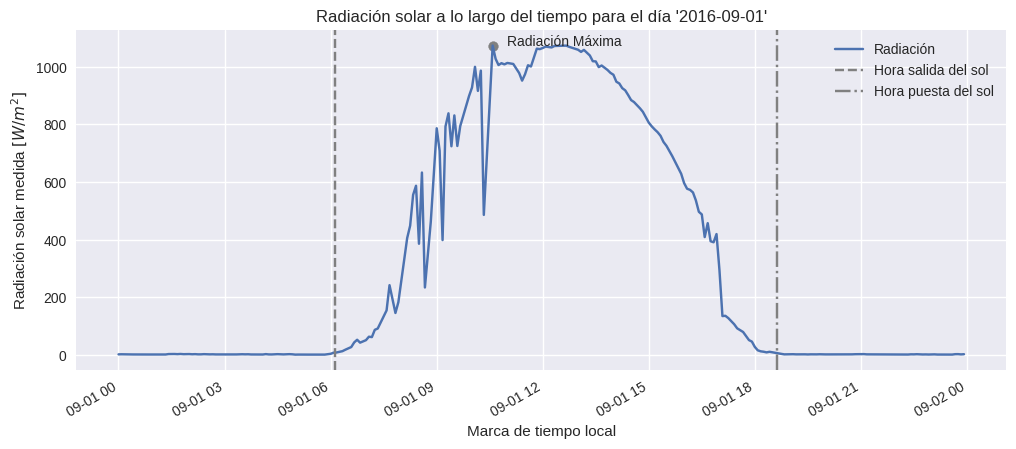

In [193]:
# Configuración de estilo de gráficos
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['savefig.bbox'] = "tight"
plt.style.use('seaborn-v0_8')

# Gráfico a lo largo del tiempo para un día
df_prep[df_prep.DatetimeLocal.between(f'{dia_mediciones} 00:00:00', f'{dia_mediciones} 23:59:59')].plot(
    x = 'DatetimeLocal',
    y = 'Radiation',
    grid = True,
    label='Radiación',
    figsize = (12, 5),
    fontsize = 10)

# Obtenemos el valor máximo de radiación medido en el día
df_prep_day = df_prep[df_prep.DatetimeLocal.between(f'{dia_mediciones} 00:00:00', f'{dia_mediciones} 23:59:59')]
df_prep_max_rad = df_prep_day[df_prep_day.Radiation == df_prep_day.Radiation.max()]

# Radiación máxima medida en el día
plt.scatter(df_prep_max_rad['DatetimeLocal'], df_prep_max_rad['Radiation'], c='gray')
plt.annotate('Radiación Máxima', (df_prep_max_rad['DatetimeLocal'], df_prep_max_rad['Radiation']),
             textcoords="offset points", xytext=(10,0), ha='left')

# Horas de salida y puesta del sol
plt.axvline(x=df_prep_max_rad['TimeSunRise'], color='gray', linestyle='--', label = 'Hora salida del sol')
plt.axvline(x=df_prep_max_rad['TimeSunSet'], color='gray', linestyle='-.', label = 'Hora puesta del sol')

plt.xlabel('Marca de tiempo local')
plt.ylabel('Radiación solar medida $[W/m^{2}]$')
plt.title(f'Radiación solar a lo largo del tiempo para el día \'{dia_mediciones}\'')
plt.legend()
plt.show()

Se observa que a partir de la hora de salida del sol se tiene un aumento de la radiación solar hasta las 12:00 PM donde empieza claramente a disminuir hasta la hora de puesta del sol.

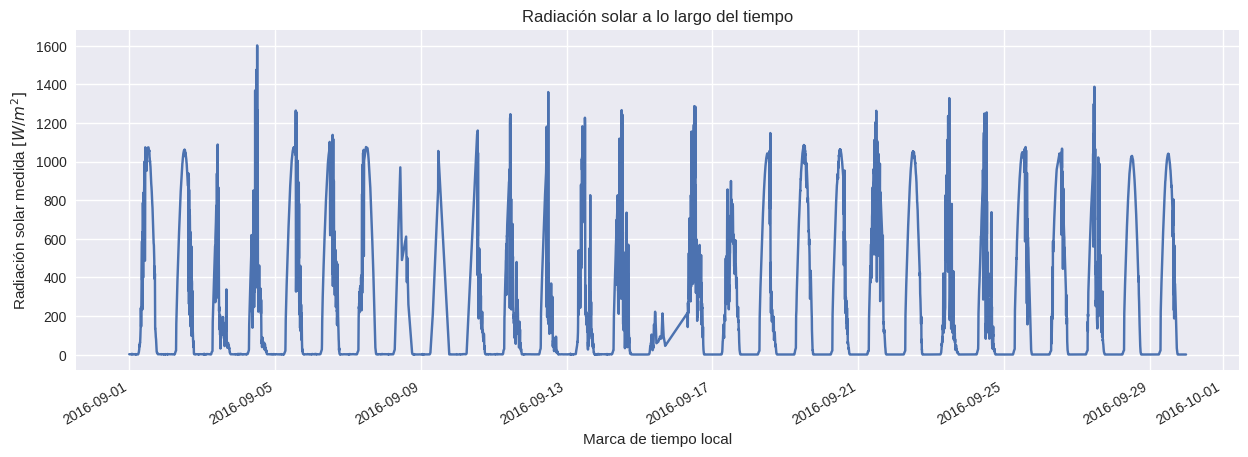

In [194]:
# Se genera un gráfico teniendo en cuenta todo un mes
df_prep[df_prep.DatetimeLocal.between('2016-09-01', '2016-09-30')].plot(
    x = 'DatetimeLocal',
    y = 'Radiation',
    grid = True,
    figsize = (15, 5),
    legend = False)
plt.xlabel('Marca de tiempo local')
plt.ylabel('Radiación solar medida $[W/m^{2}]$')
plt.title('Radiación solar a lo largo del tiempo')
plt.show()

Al generar un gráfico de todo el mes se observa un comportamiento similar en el día a día con claras variaciones de la medicición de radiación presentadas a lo largo de cada día, estas variaciones pueden estar relacionadas con otros factores meteorológicos presentados en la ubicación de la estación de medición.

### Comparación de variables numéricas

Con el fin de identificar relaciones entre las variables numericas existentes, se realizará un gráfico que permita identificar patrones entre estas. Para ello se hace uso de la función `seaborn.pairplot()` indicando además el listado de columnas con valores numéricos.

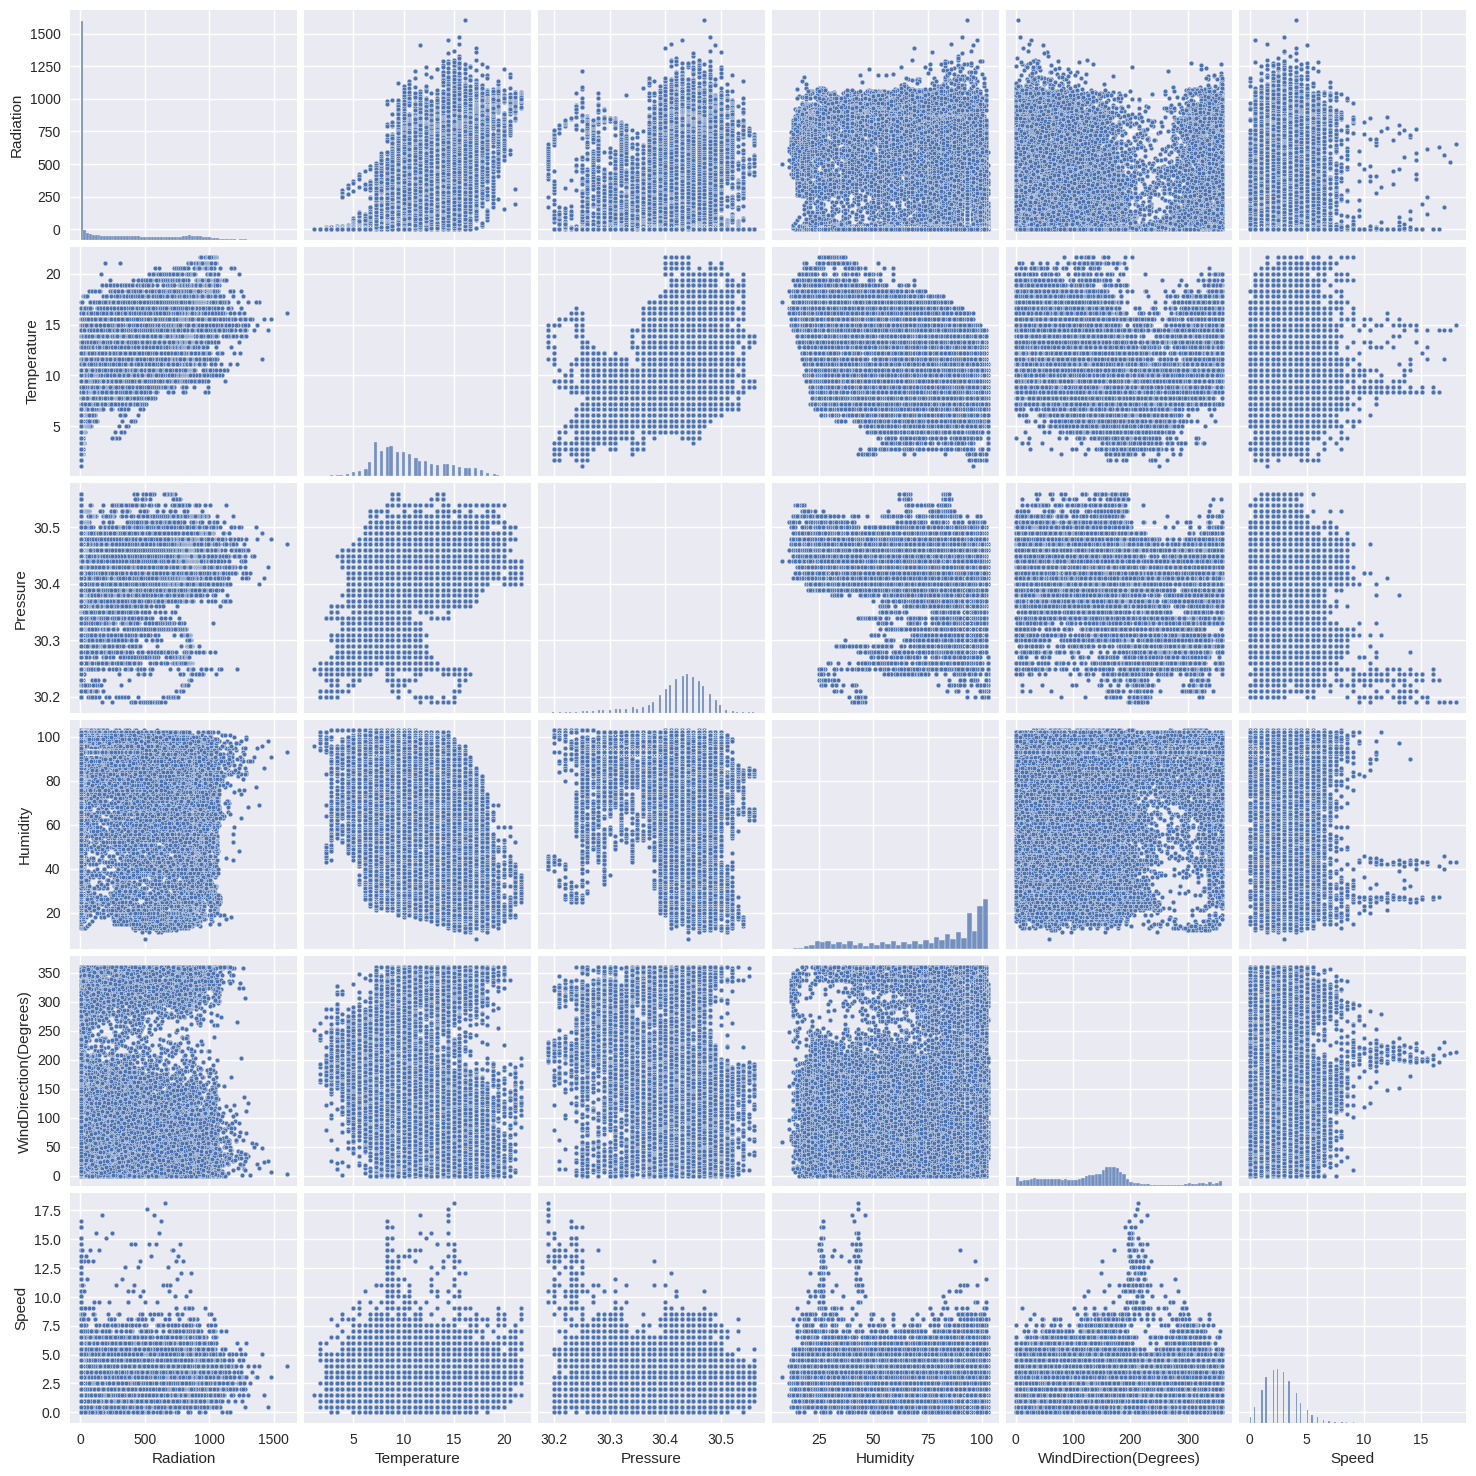

In [195]:
# Listado de variables numéricas
numVars = ['Radiation', 'Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed']
sns.pairplot(df_prep[numVars], plot_kws={"s": 12})
plt.show()

Al observar el gráfico no se identifican patrones que indiquen algún tipo de relación facilemente visible entre las variables, a excepción de la temperatura respecto a la humedad relativa, donde parece existir una relación inversa.

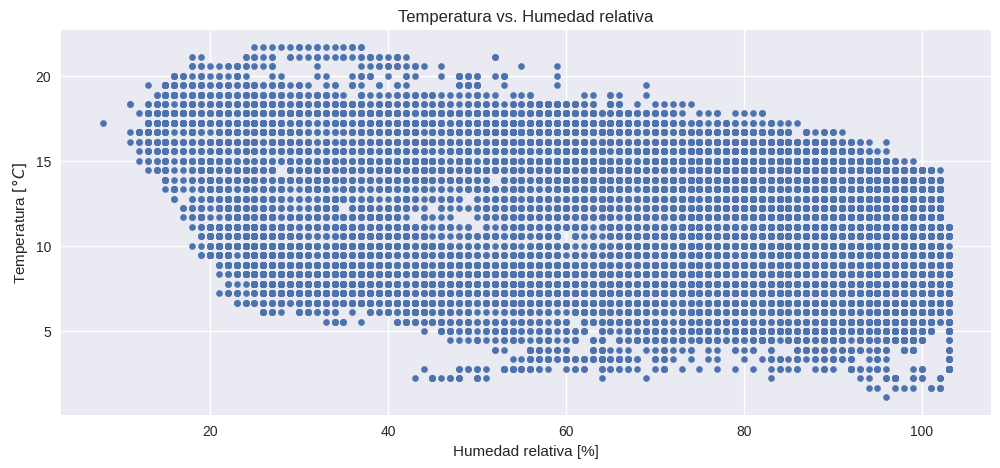

In [196]:
# Gráfico de temperatura vs. humedad relativa
df_prep.plot.scatter(x='Humidity', y='Temperature',
                     grid = True,
                     label='Radiación',
                     figsize = (12, 5),
                     fontsize = 10,
                     legend = False)
plt.xlabel("Humedad relativa [%]")
plt.ylabel("Temperatura $[°C]$")
plt.title('Temperatura vs. Humedad relativa')
plt.show()